In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76
import os
%matplotlib inline

The type of input is <class 'numpy.ndarray'>
Shape: (1920, 2160, 3)


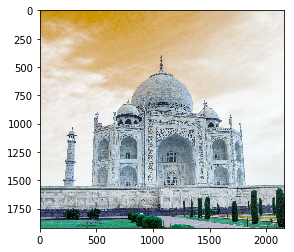

In [2]:
image=cv2.imread('1 vid.jpg')
print("The type of input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

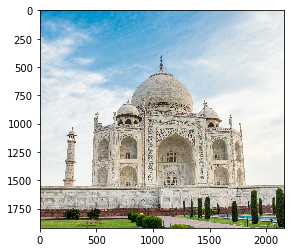

In [3]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
#converted into grayscale image for easy processing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

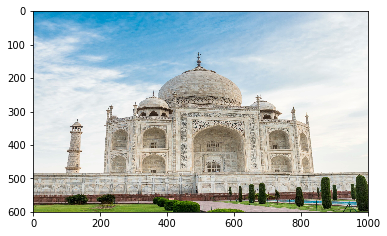

In [5]:
resized_image = cv2.resize(image, (1000, 600))
plt.imshow(resized_image)

In [ ]:
#conversion from RGB to HEX
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [8]:
modified_image = cv2.resize(image,(600,400),interpolation = cv2.INTER_AREA)
modified_image=modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
# print(modified_image.shape)

In [ ]:
#Applying KMeans Algorithm 
clf = KMeans(n_clusters=10)
labels=clf.fit_predict(modified_image)

In [ ]:
#Extracting RGB colors from the image
image=get_image('1 vid.jpg')
def get_colors(image,n,f=True):
    modified_image = cv2.resize(image,(600,400),interpolation = cv2.INTER_AREA)
    modified_image=modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    clf = KMeans(n_clusters=n)
    labels=clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

    if(f):
        plt.figure(figsize=(8,6))
        plt.pie(counts.values(),labels=hex_colors,colors=ordered_colors)
    
    return rgb_colors

In [ ]:
get_colors(image,8)

In [12]:
IMAGE_DIRECTORY = 'images'
COLORS={
    'GREEN': [0 , 128 , 0],
    'BLUE': [0, 0 , 128],
    'YELLOW': [255, 255, 0]
}
images = []
for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY,file)))

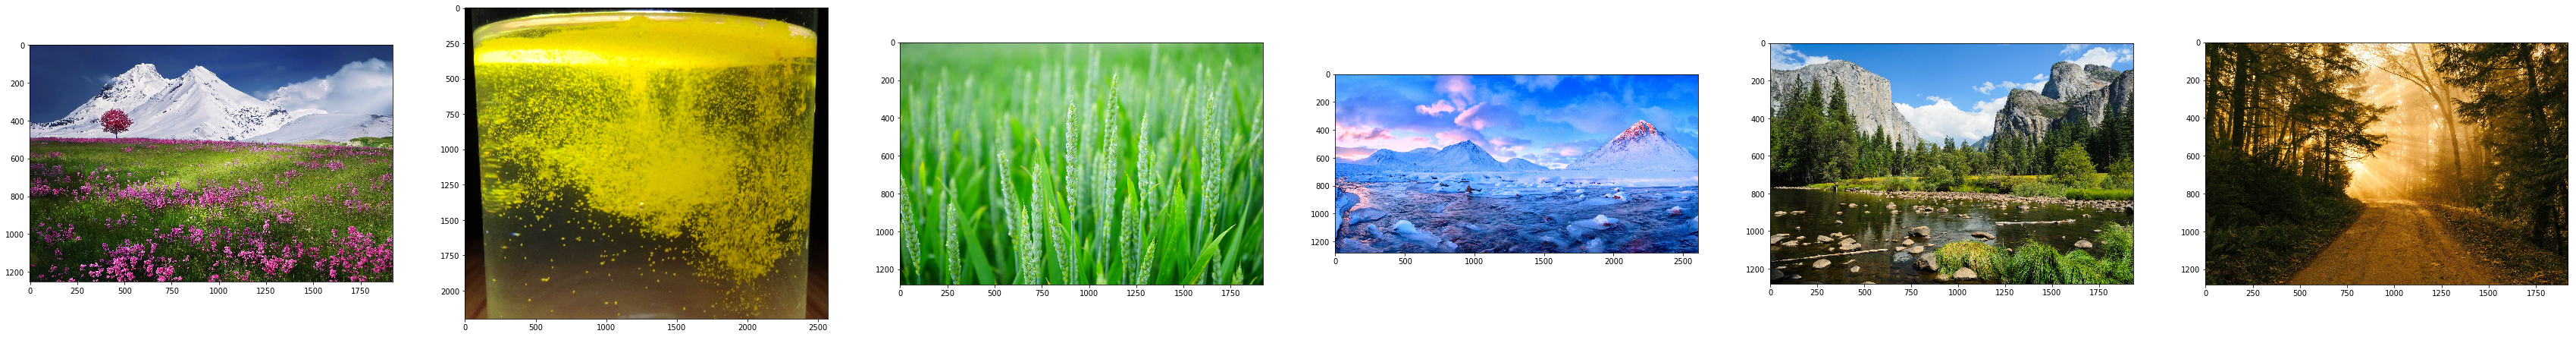

In [13]:
plt.figure(figsize=(60,80))
for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i])

In [ ]:
#Matching images on the basis of color
def match_image_by_color(image,color,threshold=60,number_of_colors=10):
    image_colors= get_colors(image,10,False)
    selected_color=rgb2lab(np.uint8(np.asarray([[color]])))
    
    selected_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if(diff < threshold):
            selected_image = True
            
    return selected_image

In [15]:
def show_selected_images(images,color,threshold,colors_to_match):
    index=1
    for i in range(len(images)):
        selected=match_image_by_color(images[i],color,threshold,colors_to_match)
        if selected:
            plt.subplot(1,5,index)
            plt.imshow(images[i])
            index+=1

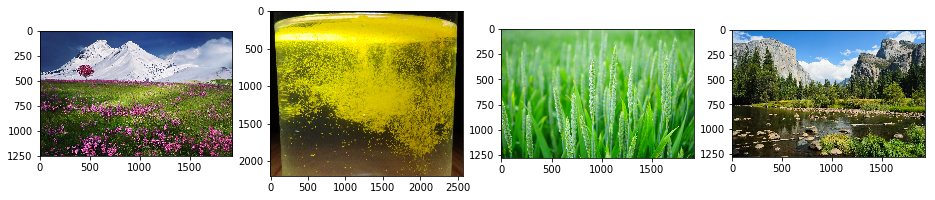

In [17]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

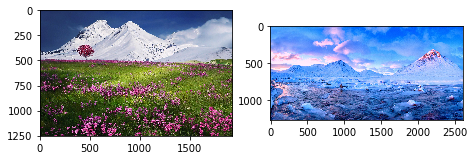

In [18]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

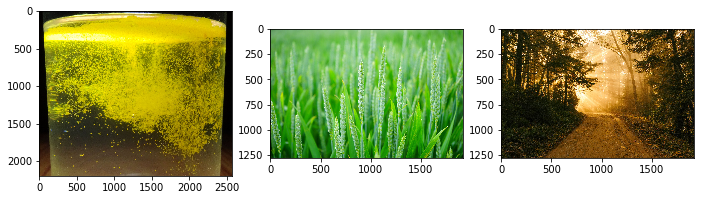

In [19]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)